# 発音記号の行列をNMF

## data

In [334]:
from sklearn.decomposition import NMF
from sklearn.decomposition import SparseCoder
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [98]:
data3 = pd.read_csv('data_preprocessed_by_hand_add_ipa_dropped.csv')

In [67]:
data = pd.read_csv('ipa_matrix.csv')

In [69]:
ipa = data['Unnamed: 0']
data = data.drop(['Unnamed: 0'], axis=1)

In [70]:
data.shape

(71, 776)

## NMF

In [157]:
error = []
for k in range(70):
    model = NMF(n_components=(k+1), init='random', random_state=0)
    P = model.fit_transform(data)
    Q = model.components_
    error.append(LA.norm(data - np.dot(P,Q), 'fro'))

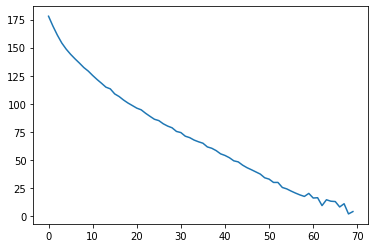

In [160]:
plt.plot(error)

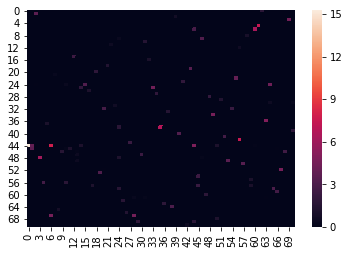

In [297]:
sns.heatmap(P)

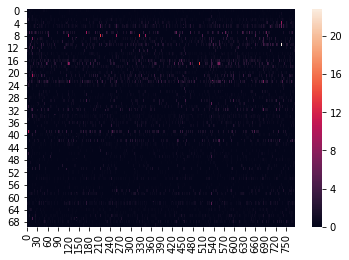

In [162]:
sns.heatmap(Q)

In [163]:
def print_ipa(P,j):
    p = P[:,j]
    return ipa[p.nonzero()[0]]

In [235]:
def get_eng_ipa(P,j):
    p = P[:44,j]
    return ipa[:44][p.nonzero()[0]]

In [228]:
print_ipa(P,10)[:43]

3     uː
8     aʊ
16     ɪ
23     b
24     t
43     w
56     t
57     d
Name: Unnamed: 0, dtype: object

In [111]:
Q[3,].argsort()

array([775, 166, 525, 169, 519, 515, 507, 502, 176, 177, 179, 183, 493,
       186, 187, 188, 192, 483, 480, 199, 473, 203, 204, 206, 529, 536,
       542, 551, 612, 608, 607, 120, 600, 122, 599, 124, 125, 597, 593,
       466, 129, 132, 583, 136, 575, 569, 142, 145, 564, 558, 151, 152,
       588, 622, 465, 459, 385, 363, 274, 276, 358, 357, 280, 355, 348,
       347, 346, 289, 345, 292, 341, 297, 299, 338, 334, 332, 307, 311,
       330, 264, 262, 388, 391, 213, 448, 219, 220, 444, 222, 223, 443,
       228, 439, 230, 464, 235, 239, 423, 421, 420, 414, 247, 248, 412,
       405, 401, 396, 433, 623, 547, 107, 667,  33, 665,  71, 714,  75,
       658,  77,  46, 723, 656,  24, 733, 645,  21,  67, 742,  64,  62,
        47,  48,  49, 689, 108,  52,  53, 677, 676, 675,  42,  41, 673,
       671,  40,  37, 642,  78, 626, 635, 631, 770, 640,  93,  12, 625,
       624, 755,   9,  97,  98, 771, 749,   2,   1, 748, 746,  86,  11,
       217, 500,  27, 101, 309, 501, 150, 144, 702, 340, 634, 22

In [130]:
data3[5:6]

,Unnamed: 0,index,Unnamed: 0.1,Unnamed: 0.1.1,japanese,english,english_ipa
5,5,7,7,7,のものものものものものものも,NO MORE NO MORE NO MORE NO MORE NO MORE NO MOR...,nəʊ mɔː nəʊ mɔː nəʊ mɔː nəʊ mɔː nəʊ mɔː nəʊ mɔ...


In [173]:
target = "aɪm ˈhɜrtɪŋ, ˈbeɪbi, aɪm ˈbroʊkən daʊn aɪ nid jʊər ˈlʌvɪŋ, ˈlʌvɪŋ, aɪ nid ɪt naʊ wɛn aɪm wɪˈθaʊt ju aɪm ˈsʌmθɪŋ wik ju gɑt mi ˈbɛgɪŋ ˈbɛgɪŋ, aɪm ɑn maɪ niz aɪ doʊnt ˈwɑnə bi ˈnidɪŋ jʊər lʌv aɪ ʤʌst ˈwɑnə bi dip ɪn jʊər lʌv ænd ɪts ˈkɪlɪŋ mi wɛn jʊr əˈweɪ u, ˈbeɪbi, kəz aɪ ˈrɪli doʊnt kɛr wɛr ju ɑr aɪ ʤʌst ˈwɑnə bi ðɛr wɛr ju ɑr ænd aɪ ˈgɑtə gɛt wʌn ˈlɪtəl teɪst jʊər ˈʃʊgər jɛs, pliz woʊnt ju kʌm ænd pʊt ɪt daʊn ɑn mi aɪm raɪt hir, kəz aɪ nid ˈlɪtəl lʌv ænd ˈlɪtəl ˈsɪmpəθi jæ ju ʃoʊ mi gʊd ˈlʌvɪŋ meɪk ɪt ˌɔlˈraɪt nid ə ˈlɪtəl ˈswitnəs ɪn maɪ laɪf jʊər ˈʃʊgər jɛs, pliz woʊnt ju kʌm ænd pʊt ɪt daʊn ɑn mi maɪ ˈbroʊkən ˈpisəz ju pɪk ðɛm ʌp doʊnt liv mi ˈhæŋɪŋ, ˈhæŋɪŋ kʌm gɪv mi sʌm wɛn aɪm wɪˈθaʊt jɑ aɪm soʊ ˈɪnsəkjər ju ɑr ðə wʌn θɪŋ ðə wʌn θɪŋ, aɪm ˈlɪvɪŋ fɔr aɪ doʊnt ˈwɑnə bi ˈnidɪŋ jʊər lʌv aɪ ʤʌst ˈwɑnə bi dip ɪn jʊər lʌv ænd ɪts ˈkɪlɪŋ mi wɛn jʊr əˈweɪ u, ˈbeɪbi, kəz aɪ ˈrɪli doʊnt kɛr wɛr ju ɑr aɪ ʤʌst ˈwɑnə bi ðɛr wɛr ju ɑr ænd aɪ ˈgɑtə gɛt wʌn ˈlɪtəl teɪst jʊər ˈʃʊgər jɛs, pliz woʊnt ju kʌm ænd pʊt ɪt daʊn ɑn mi aɪm raɪt hir, kəz aɪ nid ˈlɪtəl lʌv ænd ˈlɪtəl ˈsɪmpəθi jæ ju ʃoʊ mi gʊd ˈlʌvɪŋ meɪk ɪt ˌɔlˈraɪt nid ə ˈlɪtəl ˈswitnəs ɪn maɪ laɪf jʊər ˈʃʊgər (jʊər ˈʃʊgər) jɛs, pliz (jɛs, pliz) woʊnt ju kʌm ænd pʊt ɪt daʊn ɑn mi jæ aɪ wɑnt ðæt rɛd ˈvɛlvət aɪ wɑnt ðæt ˈʃʊgər swit doʊnt lɛt ˈnoʊˌbɑˌdi tʌʧ ɪt ənˈlɛs ðæt ˈsʌmˌbɑdiz mi aɪ ˈgɑtə bi ə mən ðɛr eɪnt noʊ ˈʌðər weɪ kəz gɜrl jʊr ˈhɑtər ðæn ˈsʌðərn ˌkæləˈfɔrnjə beɪ aɪ doʊnt ˈwɑnə pleɪ noʊ geɪmz aɪ doʊnt ˈgɑtə bi əˈfreɪd doʊnt gɪv ɔl ðæt ʃaɪ ʃɪt noʊ meɪk ʌp ɑn, ðæts maɪ ˈʃʊgər jɛs, pliz woʊnt ju kʌm ænd pʊt ɪt daʊn ɑn mi (daʊn ɑn mi) oʊ, raɪt hir (raɪt hir), kəz aɪ nid (aɪ nid) ˈlɪtəl lʌv ænd ˈlɪtəl ˈsɪmpəθi jæ ju ʃoʊ mi gʊd ˈlʌvɪŋ meɪk ɪt ˌɔlˈraɪt nid ə ˈlɪtəl ˈswitnəs ɪn maɪ laɪf jʊər ˈʃʊgər (ˈʃʊgər) jɛs, pliz (jɛs, pliz) woʊnt ju kʌm ænd pʊt ɪt daʊn ɑn mi jʊər ˈʃʊgər jɛs, pliz woʊnt ju kʌm ænd pʊt ɪt daʊn ɑn mi aɪm raɪt hir, kəz aɪ nid ˈlɪtəl lʌv ænd ˈlɪtəl ˈsɪmpəθi jæ ju ʃoʊ mi gʊd ˈlʌvɪŋ meɪk ɪt ˌɔlˈraɪt nid ə ˈlɪtəl ˈswitnəs ɪn maɪ laɪf jʊər ˈʃʊgər jɛs, pliz woʊnt ju kʌm ænd pʊt ɪt daʊn ɑn mi (daʊn ɑn mi, daʊn ɑn mi)"

In [398]:
model = NMF(n_components=30, init='random', random_state=0)
P = model.fit_transform(data)
Q = model.components_

In [394]:
target[1:4]

'ɪm '

In [395]:
P.shape

(71, 71)

In [370]:
def ipa_to_array(target):
    ipa_e = ['iː', 'ɑː', 'ɔː', 'uː', 'ɜ:', 'eɪ', 'aɪ', 'ɔi', 'aʊ', 'əʊ', 'ɪə', 'eə', 'ʊə', 'tʃ', 'dʒ', 'ə', 'ɪ', 'e', 'æ', 'ɒ', 'ʌ', 'ʊ', 'p', 'b', 't', 'd', 'k', 'g', 'f', 'v', 'θ', 'ð', 's', 'z', 'ʃ', 'ʒ', 'h', 'm', 'n', 'ŋ', 'l', 'r', 'j', 'w']
    ipa = np.zeros(len(ipa_e))
    for i in range(len(ipa_e)):
        if target.count(ipa_e[i]) != 0:
            ipa[i] = target.count(ipa_e[i])
            target = target.replace(ipa_e[i], '')
    return ipa

In [236]:
def find_soramimi(target, window, P):
    scores = []
    for i in range(len(target) - window):
        tmp = target[i:(window+i)]
        score = []
        for j in range(P.shape[1]):
            score.append(0)
            for w in list(get_eng_ipa(P, j)):
                if tmp.count(w) != 0:
                    score[j] = score[j] + tmp.count(w)
        scores.append(score)
    return scores

In [272]:
scores = np.array(find_soramimi(target, 10, P))

In [282]:
maxes = []
for i in range(len(scores)):
    maxes.append(max(scores[i]))
maxes = np.array(maxes)

In [283]:
maxes.argmax()

1425

In [288]:
scores[1425].argmax()

25

In [286]:
target[1425:1435]

'æləˈfɔrnjə'

In [321]:
print_ipa(P,23)

15    ə
31    ð
32    s
Name: Unnamed: 0, dtype: object

In [493]:
def print_atom(coef, P):
    for index, num in enumerate(coef):
        if num != 0:
            print(num)
            print(print_ipa(P, index))

In [491]:
def reconstruct(target, P):
    ipa_arr = string_to_ipa(target)
    coder = SparseCoder(dictionary = P[:44,:].T)
    ipa_arr = ipa_arr.reshape(44,1)
    coef = coder.transform(ipa_arr.T)
    print_atom(coef[0], P)

In [494]:
reconstruct('æləˈfɔrnjə', P)

0.19630743986088015
1     ɑː
5     eɪ
8     aʊ
26     k
34     ʃ
38     n
59     ɲ
Name: Unnamed: 0, dtype: object
0.25750330612463523
1     ɑː
2     ɔː
21     ʊ
24     t
28     f
29     v
34     ʃ
40     l
42     j
43     w
54     ʒ
59     ɲ
66     j
67     r
Name: Unnamed: 0, dtype: object
0.1879952984225028
11    eə
18     æ
23     b
24     t
29     v
30     θ
31     ð
33     z
36     h
38     n
39     ŋ
41     r
44     a
47     e
50     g
58     n
65     m
Name: Unnamed: 0, dtype: object
0.7974886517804696
5     eɪ
13    tʃ
15     ə
29     v
31     ð
33     z
35     ʒ
41     r
43     w
44     a
66     j
Name: Unnamed: 0, dtype: object
